# Description: External Economic Factors Impact on SPY ETF (S&P 500 Index)
We have performed individual economic analyses to understand the relationship between each economic factor and the S&P 500 ETF price.

To obtain an accurate analysis, we conducted a rate of change, scatter plot, regression, and correlation analysis.

1.   Combined Data
2.   Comparing GDP VS SPY Close Price
3.   Comparing Federal Funds VS SPY Close Price
4.   Comparing Unemployment Rate VS SPY Close Price
5.   Comparing Consumer Price Index(CPI) VS SPY Close Price
6.   Comparing Producer Price Index(PPI) VS SPY Close Price





## 1. Combined Data

In [1]:
!pip install gdown

In [2]:
import pandas as pd

In [3]:
#GDP
!gdown --id 1GsaXrLRCKCeHUyaizx2dIkD5DS-VLlTv -O GDP.csv
GDP = pd.read_csv('GDP.csv')

#Federal Fund
!gdown --id 1kig0uwZKNPjLOWMkCsq8FuaNJHE2PSGW -O DFF.csv
DFF = pd.read_csv('DFF.csv')

#Unemployment Rate
!gdown --id 1xGNoMVEHmTKgNpnOSVIGsdqhivtEpFQB -O UNRATE.csv
UNRATE = pd.read_csv('UNRATE.csv')

#Consumer price index (CPI)
!gdown --id 1e1oVjm6peQDB0Tkgx84wXXmIbM-9HjP5 -O CPIAUCSL.csv
CPIAUCSL = pd.read_csv('CPIAUCSL.csv')

#Product price index (PPI)
!gdown --id 1ZL4lebpwaCnIivAFKIddfXral4u11yzp -O PPIACO.csv
PPIACO = pd.read_csv('PPIACO.csv')

#S&P 500 ETF (SPY)
!gdown --id 130K7KnodhJA0gLPC3qf36Z55HB7o5Qcc -O SPY.csv
spy = pd.read_csv('SPY.csv')
SPY = spy[['Date', 'Close']]

# Making sure that the 'DATE' columns are in datetime format.
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
DFF['DATE'] = pd.to_datetime(DFF['DATE'])
UNRATE['DATE'] = pd.to_datetime(UNRATE['DATE'])
CPIAUCSL['DATE'] = pd.to_datetime(CPIAUCSL['DATE'])
PPIACO['DATE'] = pd.to_datetime(PPIACO['DATE'])
SPY.rename(columns={'Date': 'DATE'}, inplace=True)
SPY['DATE'] = pd.to_datetime(SPY['DATE'])

# Merging the datasets on 'DATE'
combined_data = pd.merge(GDP, DFF, on='DATE', how='outer')
combined_data = pd.merge(combined_data, UNRATE, on='DATE', how='outer')
combined_data = pd.merge(combined_data, CPIAUCSL, on='DATE', how='outer')
combined_data = pd.merge(combined_data, PPIACO, on='DATE', how='outer')
combined_data = pd.merge(combined_data, SPY, on='DATE', how='outer')


# Forward-fill missing values for the specified economic indicators.
combined_data['GDP'].fillna(method='ffill', inplace=True)
combined_data['DFF'].fillna(method='ffill', inplace=True)
combined_data['UNRATE'].fillna(method='ffill', inplace=True)
combined_data['CPIAUCSL'].fillna(method='ffill', inplace=True)
combined_data['PPIACO'].fillna(method='ffill', inplace=True)

# Dropping rows with missing SPY 'Close' data.
combined_data = combined_data.dropna(subset=['Close'])

combined_data

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GsaXrLRCKCeHUyaizx2dIkD5DS-VLlTv
To: /content/GDP.csv
100% 447/447 [00:00<00:00, 1.81MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kig0uwZKNPjLOWMkCsq8FuaNJHE2PSGW
To: /content/DFF.csv
100% 29.2k/29.2k [00:00<00:00, 80.0MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xGNoMVE

<ipython-input-3-76eb4c5ff556>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY.rename(columns={'Date': 'DATE'}, inplace=True)
<ipython-input-3-76eb4c5ff556>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SPY['DATE'] = pd.to_datetime(SPY['DATE'])


,DATE,GDP,DFF,UNRATE,CPIAUCSL,PPIACO,Close
1,2018-10-01,20917.867,2.18,3.8,252.772,204.600,291.730011
3,2019-04-01,21384.775,2.41,3.6,255.211,202.100,285.829987
4,2019-07-01,21694.282,2.39,3.7,255.685,200.700,295.660004
5,2019-10-01,21902.390,1.88,3.6,257.244,198.600,293.239990
7,2020-04-01,19913.143,0.06,14.7,256.092,185.500,246.149994
...,...,...,...,...,...,...,...
1822,2023-06-26,27623.543,5.07,3.6,303.841,253.908,431.440002
1823,2023-06-27,27623.543,5.07,3.6,303.841,253.908,436.170013
1824,2023-06-28,27623.543,5.07,3.6,303.841,253.908,436.390015
1825,2023-06-29,27623.543,5.07,3.6,303.841,253.908,438.109985


## 2. Comparing GDP VS SPY Close Price

In [4]:
# Merge GDP and SPY dataframes on the 'DATE' column.
gdp_spy_combined = pd.merge(GDP, SPY, on='DATE', how='outer')

# Sort the combined dataframe by date.
gdp_spy_combined.sort_values('DATE', inplace=True)

# Forward-fill missing values for 'GDP'.
gdp_spy_combined['GDP'].fillna(method='ffill', inplace=True)

# Drop rows where the 'Close' price is missing.
gdp_spy_combined.dropna(subset=['Close'], inplace=True)

# Display the dataframe.
gdp_spy_combined


,DATE,GDP,Close
21,2018-07-02,20798.730,271.859985
22,2018-07-03,20798.730,270.899994
23,2018-07-05,20798.730,273.109985
24,2018-07-06,20798.730,275.420013
25,2018-07-09,20798.730,277.899994
...,...,...,...
1262,2023-06-26,27063.012,431.440002
1263,2023-06-27,27063.012,436.170013
1264,2023-06-28,27063.012,436.390015
1265,2023-06-29,27063.012,438.109985


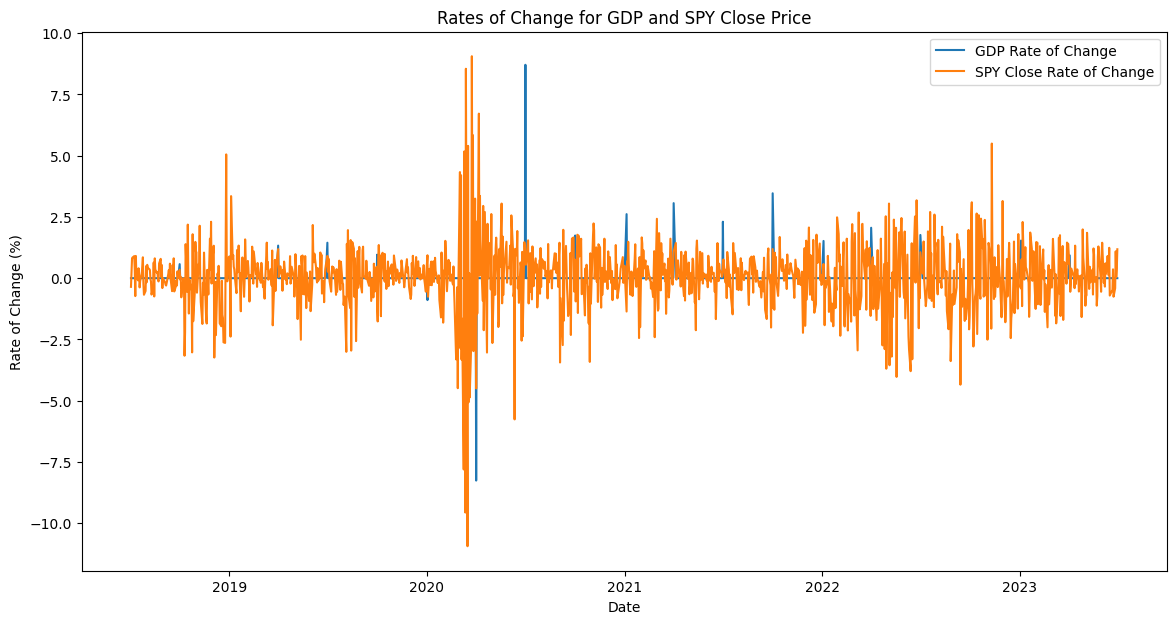

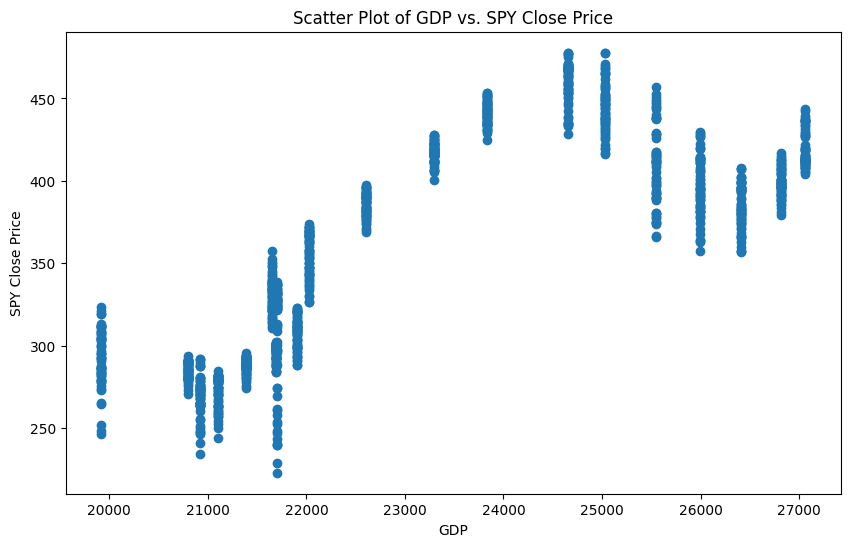

Correlation matrix:
             GDP     Close
GDP    1.000000  0.784732
Close  0.784732  1.000000
Regression line equation: y = 0.02296974381785572x + -175.15871147790364
R-squared value: 0.6158045391289795
Correlation Coefficient between GDP and SPY Close: 0.7847321448296731


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Calculate the rates of change (percentage change)
gdp_spy_combined['GDP Change'] = gdp_spy_combined['GDP'].pct_change() * 100
gdp_spy_combined['Close Change'] = gdp_spy_combined['Close'].pct_change() * 100

# Drop the initial row with NaN values that resulted from the pct_change
gdp_spy_combined.dropna(inplace=True)

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(14, 7))
plt.plot(gdp_spy_combined['DATE'], gdp_spy_combined['GDP Change'], label='GDP Rate of Change')
plt.plot(gdp_spy_combined['DATE'], gdp_spy_combined['Close Change'], label='SPY Close Rate of Change')
plt.legend()
plt.title('Rates of Change for GDP and SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Rate of Change (%)')
plt.show()

# Scatter plot for the original values
plt.figure(figsize=(10, 6))
plt.scatter(gdp_spy_combined['GDP'], gdp_spy_combined['Close'])
plt.title('Scatter Plot of GDP vs. SPY Close Price')
plt.xlabel('GDP')
plt.ylabel('SPY Close Price')
plt.show()

# Correlation Analysis
correlation = gdp_spy_combined[['GDP', 'Close']].corr()
print('Correlation matrix:\n', correlation)

# Regression Analysis for the original values
slope, intercept, r_value, p_value, std_err = linregress(gdp_spy_combined['GDP'], gdp_spy_combined['Close'])
print(f"Regression line equation: y = {slope}x + {intercept}")
print(f"R-squared value: {r_value**2}")

# Calculate the Pearson Correlation Coefficient for GDP and SPY Close prices.
corr_coefficient = gdp_spy_combined['GDP'].corr(gdp_spy_combined['Close'])
print(f'Correlation Coefficient between GDP and SPY Close: {corr_coefficient}')


## 3. Comparing Federal Funds VS SPY Close Price

In [6]:
# Merge Federal Funds Rate (DFF) and SPY dataframes on the 'DATE' column.
dff_spy_combined = pd.merge(DFF, SPY, on='DATE', how='outer')

# Sort the combined dataframe by date.
dff_spy_combined.sort_values('DATE', inplace=True)

# Forward-fill missing values for 'DFF'.
dff_spy_combined['DFF'].fillna(method='ffill', inplace=True)

# Drop rows where the 'Close' price is missing.
dff_spy_combined.dropna(subset=['Close'], inplace=True)

# Display the dataframe.
dff_spy_combined


,DATE,DFF,Close
1,2018-07-02,1.91,271.859985
2,2018-07-03,1.91,270.899994
4,2018-07-05,1.91,273.109985
5,2018-07-06,1.91,275.420013
8,2018-07-09,1.91,277.899994
...,...,...,...
1821,2023-06-26,5.07,431.440002
1822,2023-06-27,5.07,436.170013
1823,2023-06-28,5.07,436.390015
1824,2023-06-29,5.07,438.109985


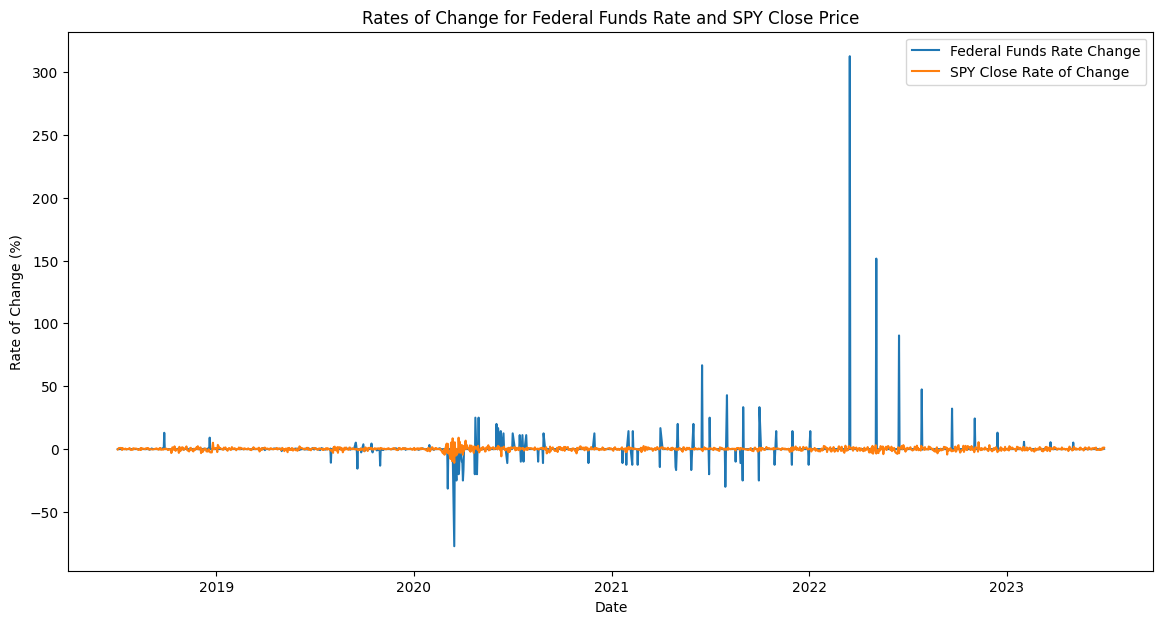

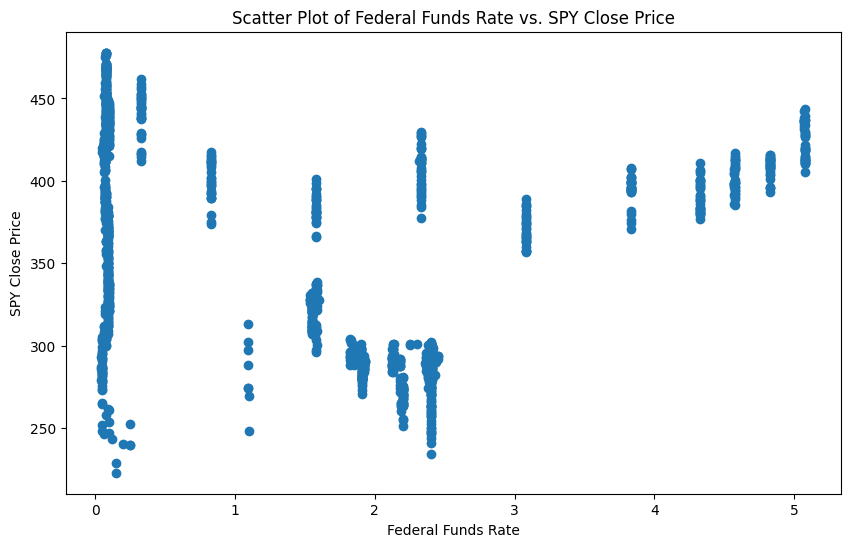

Correlation matrix:
             DFF     Close
DFF    1.000000 -0.126065
Close -0.126065  1.000000
Regression line equation: y = -5.32050988153158x + 366.22412194947515
R-squared value: 0.01589230729516984
Correlation Coefficient between Federal Funds Rate and SPY Close: -0.12606469487992994


In [7]:
# Calculate the rates of change (percentage change)
dff_spy_combined['DFF Change'] = dff_spy_combined['DFF'].pct_change() * 100
dff_spy_combined['Close Change'] = dff_spy_combined['Close'].pct_change() * 100

# Drop the initial row with NaN values that resulted from the pct_change
dff_spy_combined.dropna(inplace=True)

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(14, 7))
plt.plot(dff_spy_combined['DATE'], dff_spy_combined['DFF Change'], label='Federal Funds Rate Change')
plt.plot(dff_spy_combined['DATE'], dff_spy_combined['Close Change'], label='SPY Close Rate of Change')
plt.legend()
plt.title('Rates of Change for Federal Funds Rate and SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Rate of Change (%)')
plt.show()

# Scatter plot for the original values
plt.figure(figsize=(10, 6))
plt.scatter(dff_spy_combined['DFF'], dff_spy_combined['Close'])
plt.title('Scatter Plot of Federal Funds Rate vs. SPY Close Price')
plt.xlabel('Federal Funds Rate')
plt.ylabel('SPY Close Price')
plt.show()

# Correlation Analysis
correlation = dff_spy_combined[['DFF', 'Close']].corr()
print('Correlation matrix:\n', correlation)

# Regression Analysis for the original values
slope, intercept, r_value, p_value, std_err = linregress(dff_spy_combined['DFF'], dff_spy_combined['Close'])
print(f"Regression line equation: y = {slope}x + {intercept}")
print(f"R-squared value: {r_value**2}")

# Calculate the Pearson Correlation Coefficient for Federal Funds Rate and SPY Close prices.
corr_coefficient = dff_spy_combined['DFF'].corr(dff_spy_combined['Close'])
print(f'Correlation Coefficient between Federal Funds Rate and SPY Close: {corr_coefficient}')


## 4. Comparing Unemployment Rate VS SPY Close Price

In [8]:
# Merge Unemployment Rate (UNRATE) and SPY dataframes on the 'DATE' column.
unrate_spy_combined = pd.merge(UNRATE, SPY, on='DATE', how='outer')

# Sort the combined dataframe by date.
unrate_spy_combined.sort_values('DATE', inplace=True)

# Forward-fill missing values for 'UNRATE'.
unrate_spy_combined['UNRATE'].fillna(method='ffill', inplace=True)

# Drop rows where the 'Close' price is missing.
unrate_spy_combined.dropna(subset=['Close'], inplace=True)

# Display the dataframe.
unrate_spy_combined


,DATE,UNRATE,Close
61,2018-07-02,3.8,271.859985
62,2018-07-03,3.8,270.899994
63,2018-07-05,3.8,273.109985
64,2018-07-06,3.8,275.420013
65,2018-07-09,3.8,277.899994
...,...,...,...
1274,2023-06-26,3.6,431.440002
1275,2023-06-27,3.6,436.170013
1276,2023-06-28,3.6,436.390015
1277,2023-06-29,3.6,438.109985


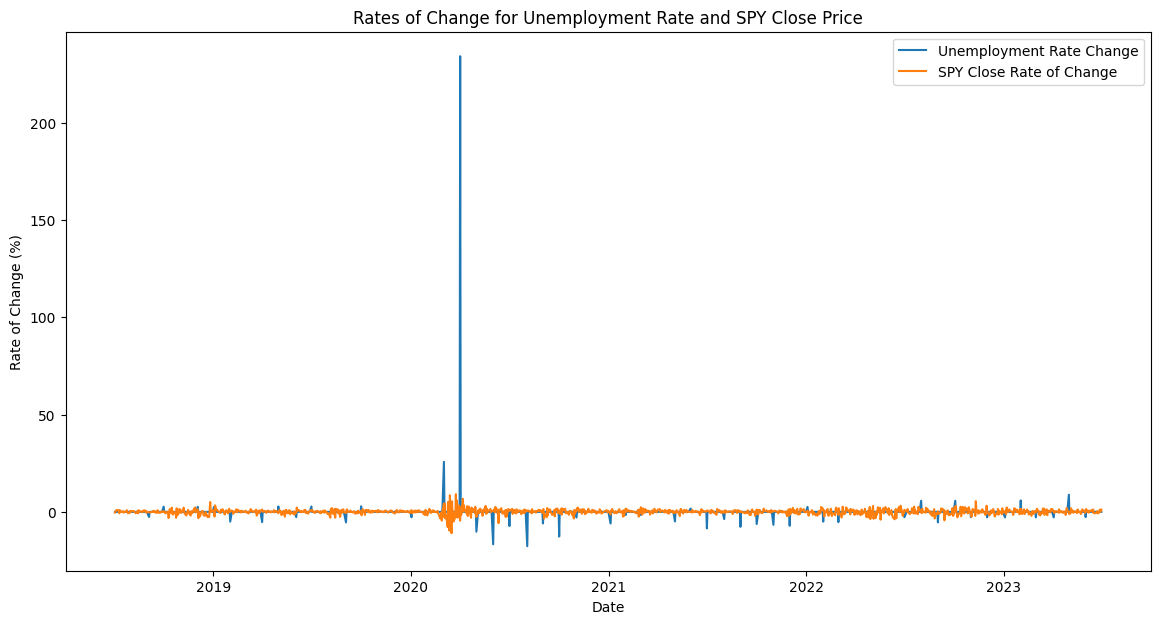

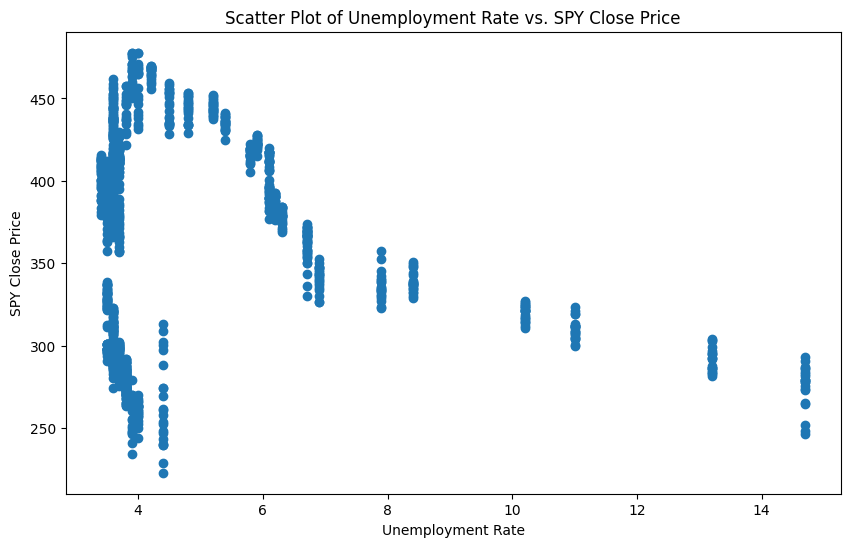

Correlation matrix:
          UNRATE    Close
UNRATE  1.00000 -0.15608
Close  -0.15608  1.00000
Regression line equation: y = -4.272410414041696x + 378.97812447942215
R-squared value: 0.024360978511703
Correlation Coefficient between Unemployment Rate and SPY Close: -0.15608003879965884


In [9]:
# Calculate the rates of change (percentage change)
unrate_spy_combined['UNRATE Change'] = unrate_spy_combined['UNRATE'].pct_change() * 100
unrate_spy_combined['Close Change'] = unrate_spy_combined['Close'].pct_change() * 100

# Drop the initial row with NaN values that resulted from the pct_change
unrate_spy_combined.dropna(inplace=True)

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(14, 7))
plt.plot(unrate_spy_combined['DATE'], unrate_spy_combined['UNRATE Change'], label='Unemployment Rate Change')
plt.plot(unrate_spy_combined['DATE'], unrate_spy_combined['Close Change'], label='SPY Close Rate of Change')
plt.legend()
plt.title('Rates of Change for Unemployment Rate and SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Rate of Change (%)')
plt.show()

# Scatter plot for the original values
plt.figure(figsize=(10, 6))
plt.scatter(unrate_spy_combined['UNRATE'], unrate_spy_combined['Close'])
plt.title('Scatter Plot of Unemployment Rate vs. SPY Close Price')
plt.xlabel('Unemployment Rate')
plt.ylabel('SPY Close Price')
plt.show()

# Correlation Analysis
correlation = unrate_spy_combined[['UNRATE', 'Close']].corr()
print('Correlation matrix:\n', correlation)

# Regression Analysis for the original values
slope, intercept, r_value, p_value, std_err = linregress(unrate_spy_combined['UNRATE'], unrate_spy_combined['Close'])
print(f"Regression line equation: y = {slope}x + {intercept}")
print(f"R-squared value: {r_value**2}")

# Calculate the Pearson Correlation Coefficient for Unemployment Rate and SPY Close prices.
corr_coefficient = unrate_spy_combined['UNRATE'].corr(unrate_spy_combined['Close'])
print(f'Correlation Coefficient between Unemployment Rate and SPY Close: {corr_coefficient}')


## 5. Comparing Consumer Price Index(CPI) VS SPY Close Price

In [10]:
# Merge Consumer Price Index (CPIAUCSL) and SPY dataframes on the 'DATE' column.
cpi_spy_combined = pd.merge(CPIAUCSL, SPY, on='DATE', how='outer')

# Sort the combined dataframe by date.
cpi_spy_combined.sort_values('DATE', inplace=True)

# Forward-fill missing values for 'CPIAUCSL'.
cpi_spy_combined['CPIAUCSL'].fillna(method='ffill', inplace=True)

# Drop rows where the 'Close' price is missing.
cpi_spy_combined.dropna(subset=['Close'], inplace=True)

# Display the dataframe.
cpi_spy_combined


,DATE,CPIAUCSL,Close
61,2018-07-02,251.214,271.859985
62,2018-07-03,251.214,270.899994
63,2018-07-05,251.214,273.109985
64,2018-07-06,251.214,275.420013
65,2018-07-09,251.214,277.899994
...,...,...,...
1274,2023-06-26,303.841,431.440002
1275,2023-06-27,303.841,436.170013
1276,2023-06-28,303.841,436.390015
1277,2023-06-29,303.841,438.109985


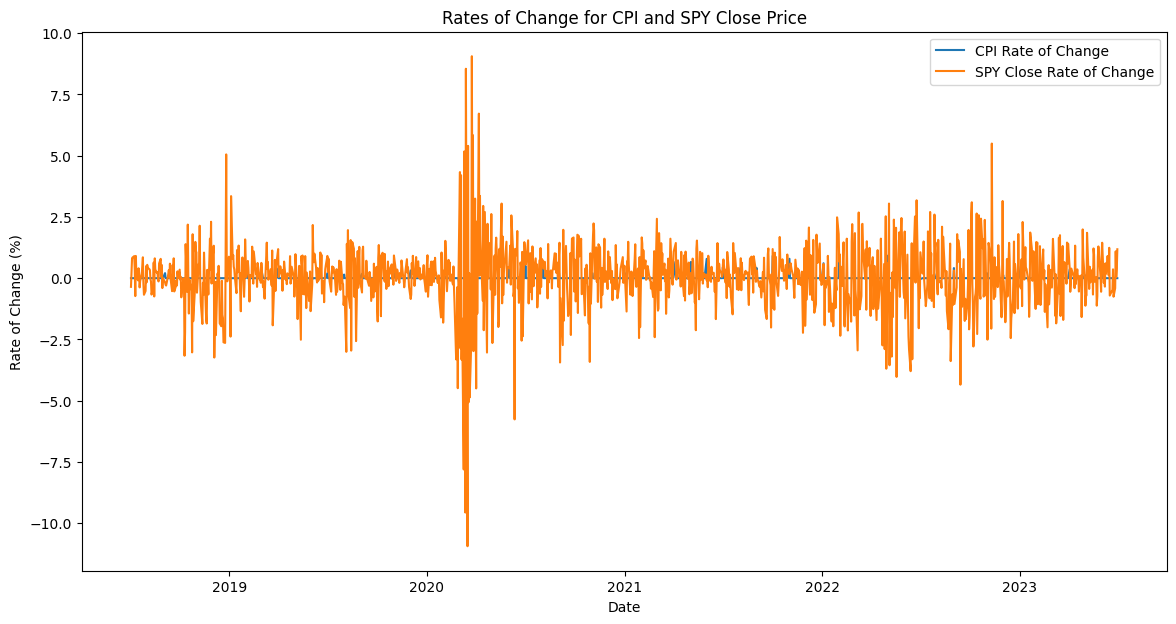

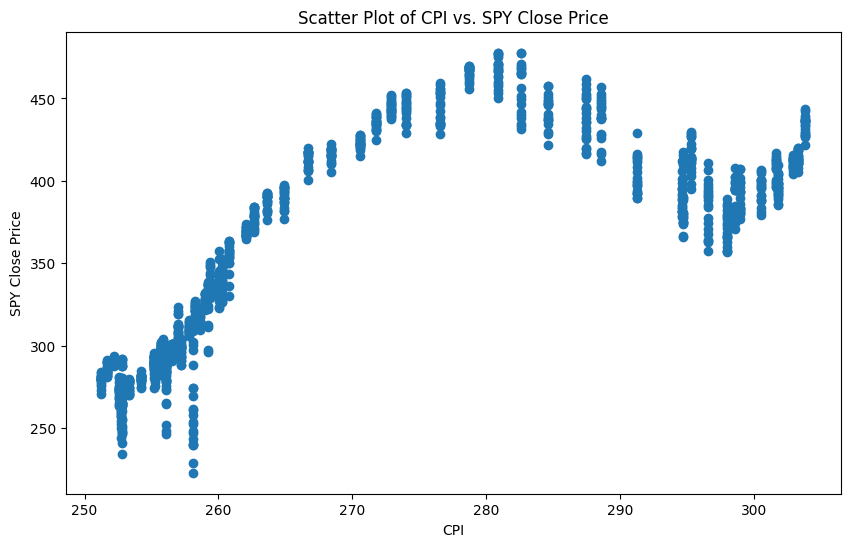

Correlation matrix:
           CPIAUCSL     Close
CPIAUCSL  1.000000  0.739818
Close     0.739818  1.000000
Regression line equation: y = 2.679767227002357x + -368.32543632572805
R-squared value: 0.5473305323734297
Correlation Coefficient between CPI and SPY Close: 0.7398179048748615


In [11]:
# Calculate the rates of change (percentage change)
cpi_spy_combined['CPI Change'] = cpi_spy_combined['CPIAUCSL'].pct_change() * 100
cpi_spy_combined['Close Change'] = cpi_spy_combined['Close'].pct_change() * 100

# Drop the initial row with NaN values that resulted from the pct_change
cpi_spy_combined.dropna(inplace=True)

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(14, 7))
plt.plot(cpi_spy_combined['DATE'], cpi_spy_combined['CPI Change'], label='CPI Rate of Change')
plt.plot(cpi_spy_combined['DATE'], cpi_spy_combined['Close Change'], label='SPY Close Rate of Change')
plt.legend()
plt.title('Rates of Change for CPI and SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Rate of Change (%)')
plt.show()

# Scatter plot for the original values
plt.figure(figsize=(10, 6))
plt.scatter(cpi_spy_combined['CPIAUCSL'], cpi_spy_combined['Close'])
plt.title('Scatter Plot of CPI vs. SPY Close Price')
plt.xlabel('CPI')
plt.ylabel('SPY Close Price')
plt.show()

# Correlation Analysis
correlation = cpi_spy_combined[['CPIAUCSL', 'Close']].corr()
print('Correlation matrix:\n', correlation)

# Regression Analysis for the original values
slope, intercept, r_value, p_value, std_err = linregress(cpi_spy_combined['CPIAUCSL'], cpi_spy_combined['Close'])
print(f"Regression line equation: y = {slope}x + {intercept}")
print(f"R-squared value: {r_value**2}")

# Calculate the Pearson Correlation Coefficient for CPI and SPY Close prices.
corr_coefficient = cpi_spy_combined['CPIAUCSL'].corr(cpi_spy_combined['Close'])
print(f'Correlation Coefficient between CPI and SPY Close: {corr_coefficient}')


## 6. Comparing Producer Price Index(PPI) VS SPY Close Price

In [12]:
# Merge Producer Price Index (PPIACO) and SPY dataframes on the 'DATE' column.
ppi_spy_combined = pd.merge(PPIACO, SPY, on='DATE', how='outer')

# Sort the combined dataframe by date.
ppi_spy_combined.sort_values('DATE', inplace=True)

# Forward-fill missing values for 'PPIACO'.
ppi_spy_combined['PPIACO'].fillna(method='ffill', inplace=True)

# Drop rows where the 'Close' price is missing.
ppi_spy_combined.dropna(subset=['Close'], inplace=True)

# Display the dataframe.
ppi_spy_combined


,DATE,PPIACO,Close
61,2018-07-02,204.300,271.859985
62,2018-07-03,204.300,270.899994
63,2018-07-05,204.300,273.109985
64,2018-07-06,204.300,275.420013
65,2018-07-09,204.300,277.899994
...,...,...,...
1274,2023-06-26,253.908,431.440002
1275,2023-06-27,253.908,436.170013
1276,2023-06-28,253.908,436.390015
1277,2023-06-29,253.908,438.109985


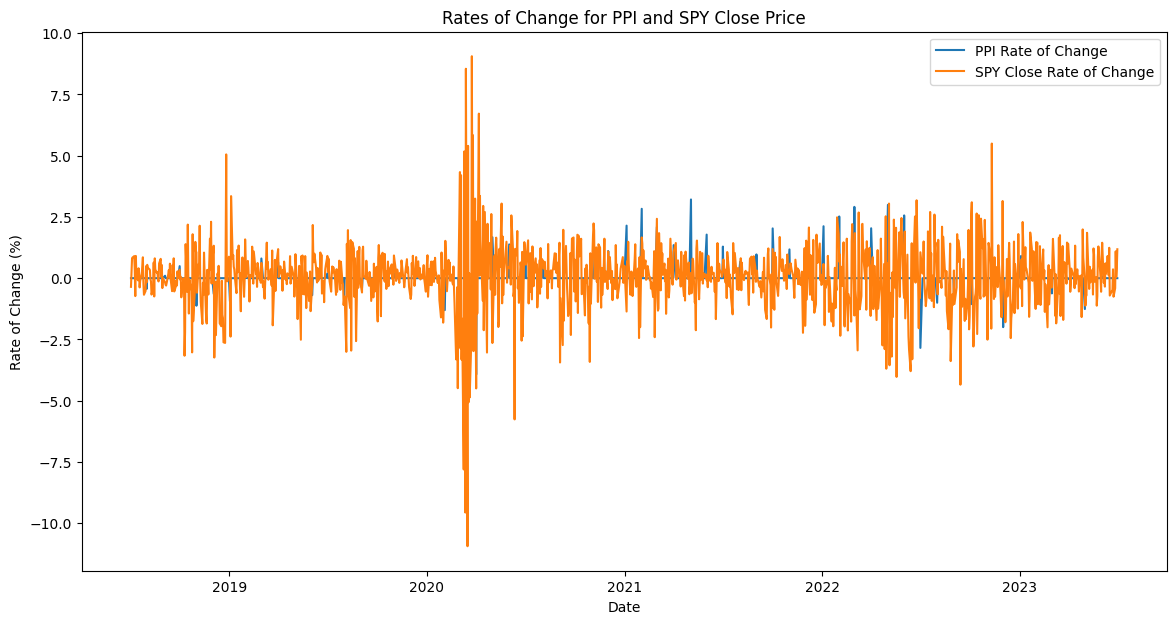

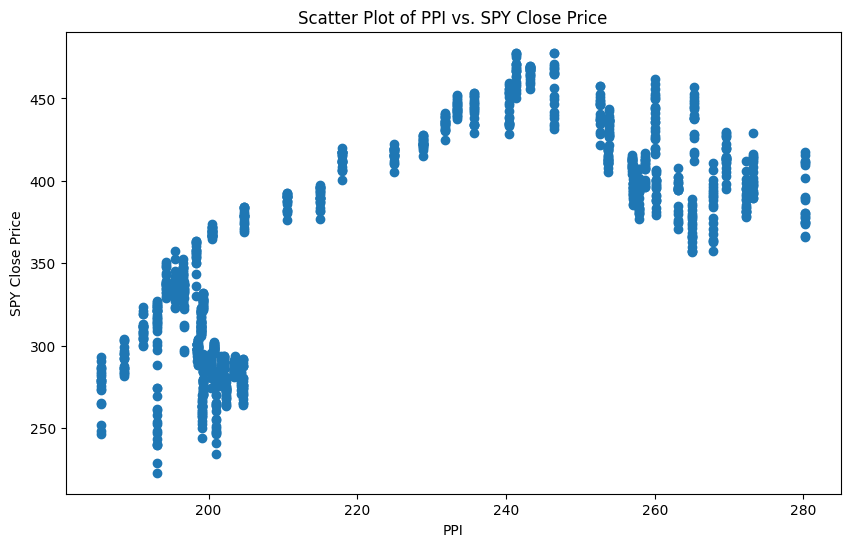

Correlation matrix:
           PPIACO     Close
PPIACO  1.000000  0.754779
Close   0.754779  1.000000
Regression line equation: y = 1.695986320880815x + -20.482598892931264
R-squared value: 0.5696914828747327
Correlation Coefficient between PPI and SPY Close: 0.7547790954145012


In [13]:
# Calculate the rates of change (percentage change)
ppi_spy_combined['PPI Change'] = ppi_spy_combined['PPIACO'].pct_change() * 100
ppi_spy_combined['Close Change'] = ppi_spy_combined['Close'].pct_change() * 100

# Drop the initial row with NaN values that resulted from the pct_change
ppi_spy_combined.dropna(inplace=True)

# Visualization
# Line plot for the rates of change
plt.figure(figsize=(14, 7))
plt.plot(ppi_spy_combined['DATE'], ppi_spy_combined['PPI Change'], label='PPI Rate of Change')
plt.plot(ppi_spy_combined['DATE'], ppi_spy_combined['Close Change'], label='SPY Close Rate of Change')
plt.legend()
plt.title('Rates of Change for PPI and SPY Close Price')
plt.xlabel('Date')
plt.ylabel('Rate of Change (%)')
plt.show()

# Scatter plot for the original values
plt.figure(figsize=(10, 6))
plt.scatter(ppi_spy_combined['PPIACO'], ppi_spy_combined['Close'])
plt.title('Scatter Plot of PPI vs. SPY Close Price')
plt.xlabel('PPI')
plt.ylabel('SPY Close Price')
plt.show()

# Correlation Analysis
correlation = ppi_spy_combined[['PPIACO', 'Close']].corr()
print('Correlation matrix:\n', correlation)

# Regression Analysis for the original values
slope, intercept, r_value, p_value, std_err = linregress(ppi_spy_combined['PPIACO'], ppi_spy_combined['Close'])
print(f"Regression line equation: y = {slope}x + {intercept}")
print(f"R-squared value: {r_value**2}")

# Calculate the Pearson Correlation Coefficient for PPI and SPY Close prices.
corr_coefficient = ppi_spy_combined['PPIACO'].corr(ppi_spy_combined['Close'])
print(f'Correlation Coefficient between PPI and SPY Close: {corr_coefficient}')
